In [1]:
import os
import numpy as np
from brian2 import *
from spike_train.synthetic_spike_train import SpikeTrainGenerator
from stdp.make_synth_spikes import *

In [2]:
spike_gen = SpikeTrainGenerator(42)
rng = np.random.default_rng(42)

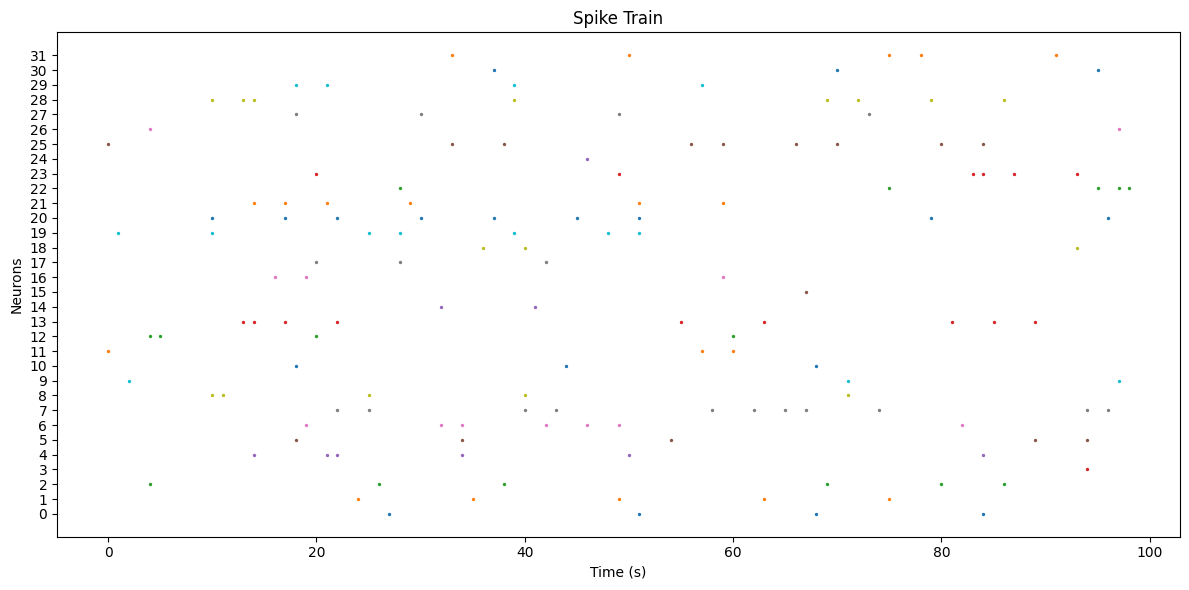

In [3]:
class0_poisson = gen_class0_poisson(32, 100, 0.05, rng)
spike_gen.plot_spike_train(class0_poisson)

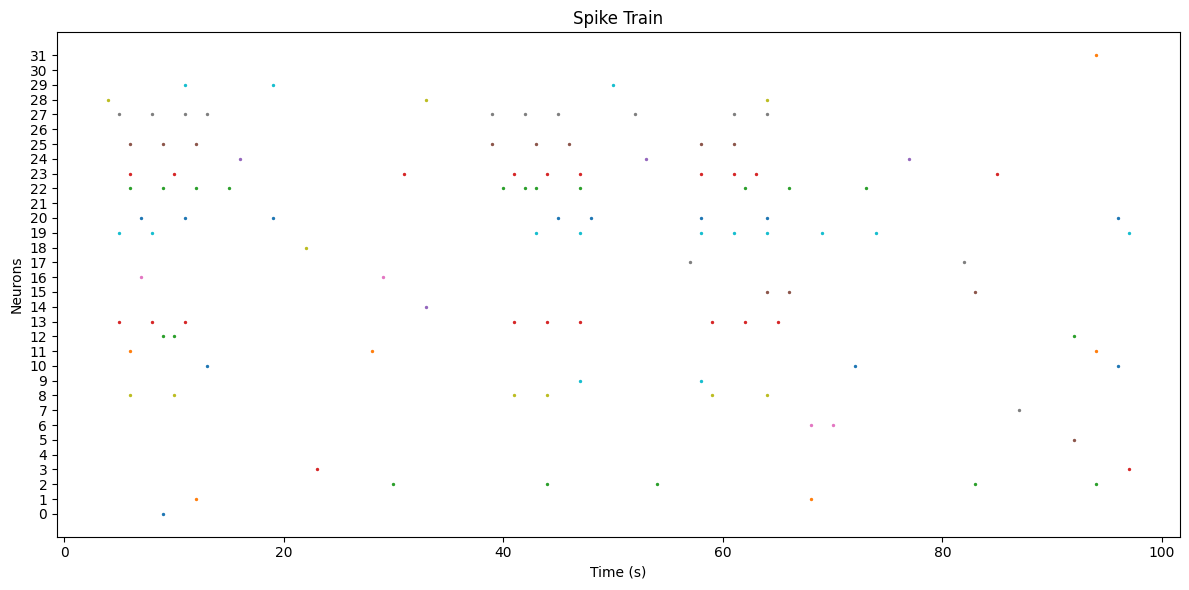

In [4]:
sig_channels = sorted(rng.choice(np.arange(32), size=min(8, 32), replace=False).tolist())

class1_bursty = gen_class1_bursty(
    C=32,
    T=100,
    sig_channels=sig_channels,
    n_bursts=3,
    burst_width=8,
    high_rate=0.6,
    refractory=2,
    noise_rate=0.02,
    jitter=2,
    sync=0.7,
    rng=rng
)

spike_gen.plot_spike_train(class1_bursty)

In [5]:
homo_spike_train = spike_gen.generate_homogeneous_poisson_spikes(
    n_neurons=1,
    duration=0.5,
    rate=50
)

In [6]:
inhomo_spike_train = spike_gen.generate_inhomogeneous_poisson_spikes(
    n_neurons=1,
    duration=0.5,
    rate_fn=lambda t: 50 + 30 * np.sin(2 * np.pi * t)
)

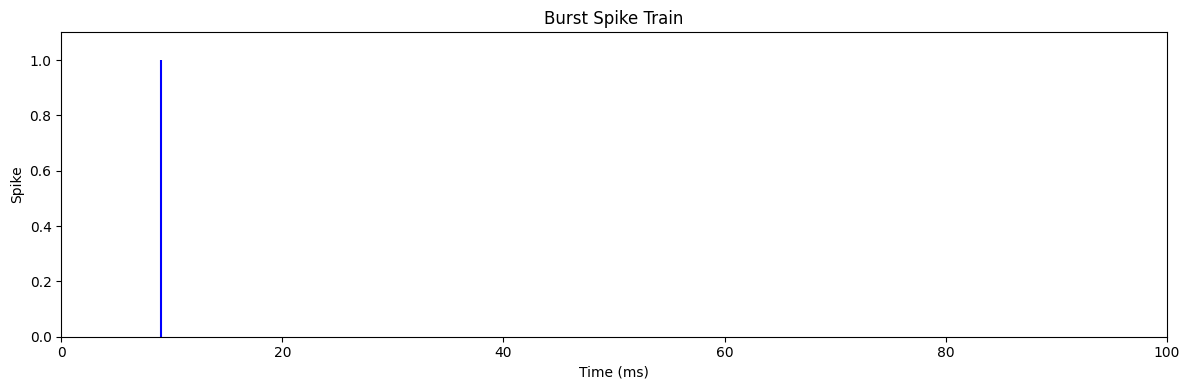

In [7]:
import matplotlib.pyplot as plt
import numpy as np

spike_train = np.array(class1_bursty[0])
T = len(spike_train)

time = np.arange(T)

plt.figure(figsize=(12, 4))
for t in time[spike_train == 1]:
    plt.vlines(t, 0, 1, color='blue')

plt.xlim(0, T)
plt.ylim(0, 1.1)
plt.xlabel("Time (ms)")
plt.ylabel("Spike")
plt.title("Burst Spike Train")
plt.tight_layout()
plt.show()

In [10]:
# generate dataset
rng = np.random.default_rng(42)
out_dir = Path("spike_data/raster_plot")

sig_channels = sorted(rng.choice(np.arange(32), size=min(8, 32), replace=False).tolist())

n_sample = 2
channels = 32
time = 100

n0 = n_sample // 2
n1 = n_sample - n0

for i in range(n0):
    class0 = gen_class0_poisson(channels, time, 0.05, rng)
    np.savez_compressed(out_dir / f"class0_{i:04d}.npz", spike_matrix=class0, label=0)

for i in range(n1):
    class1 = gen_class1_bursty(
        C=channels,
        T=time,
        sig_channels=sig_channels,
        n_bursts=3,
        burst_width=8,
        high_rate=0.6,
        refractory=2,
        noise_rate=0.02,
        jitter=2,
        sync=0.7,
        rng=rng
    )
    np.savez_compressed(out_dir / f"class1_{i:04d}.npz", spike_matrix=class1, label=1)


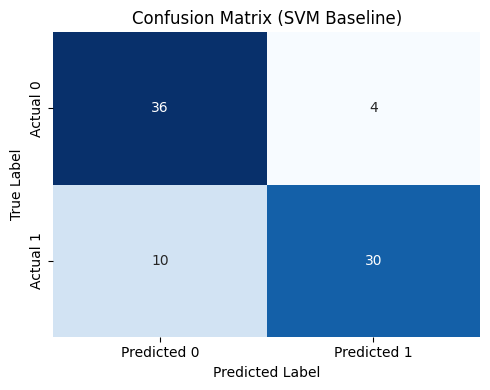

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = np.array([[36,4],[10,30]])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVM Baseline)")
plt.tight_layout()
plt.show()